### This notebook should be used for testing new datasets and models when saving their activations at inference time.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import hydra
from hydra import compose, initialize
from hydra.utils import instantiate
import torch
import pyrootutils

In [2]:
def setup(model='default', task='default'):
    '''
    Annoying but necessary function to setup the hydra environment within a jupyter notebook.
    '''
    pyrootutils.setup_root('.', dotenv=True, pythonpath=True)
    hydra.core.global_hydra.GlobalHydra.instance().clear()
    initialize(config_path='config')
    cfg = compose(config_name='inference', 
                  overrides=[f'model={model}', 
                             f'task={task}', 
                             'model.probe_layers=null']) # get rid of this line if you want to probe all layers.
    return cfg

In [ ]:
# Basic setup for probing the model.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
cfg = setup(task='scene_description', model='qwen')
task = instantiate(cfg.task)
model = instantiate(cfg.model, task=task)

Using device: cpu
Generating full dataset...
/scratch/gpfs/JDC/declan/probing/data/scene_description


In [2]:
df.response

0        [1]
1        [1]
2        [1]
3        [1]
4        [1]
        ... 
3995     [9]
3996     [9]
3997     [9]
3998     [9]
3999    [10]
Name: response, Length: 4000, dtype: object

<Axes: xlabel='n_dots', ylabel='correct'>

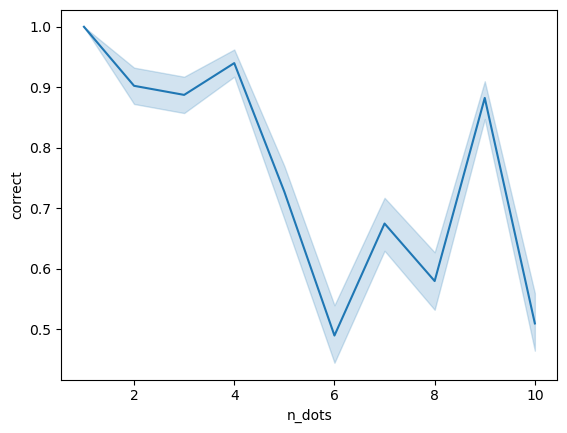

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/scratch/gpfs/JDC/declan/probing/output/numerosity_estimation/qwen/model_responses.csv')
df['response'] = df['response'].apply(lambda x: int(x.strip('[]')))
df['correct'] = df.response==df.n_dots
sns.lineplot(data=df, x='n_dots', y='correct')